In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read in the data frame
df1 = pd.read_csv('~/Documents/media_screening_data_v2_7.8.21.csv')
df1.head(10)

,WellPosition,Metabolite,Pyroptosis condition,Timepoint,Abs_450,Abs_560
0,A:10,DMSO,LPS + NG2,0,0.176844,0.362318
1,A:11,CONTROL,LPS + NG2,0,0.166724,0.332318
2,A:3,HMV,LPS + NG2,0,0.162394,0.336100
3,A:4,AHC,LPS + NG2,0,0.183140,0.358487
4,A:5,BYR,LPS + NG2,0,0.170901,0.346561
5,A:6,TRIG,LPS + NG2,0,0.190830,0.361568
6,A:7,CBZ,LPS + NG2,0,0.161815,0.331793
7,A:8,B5,LPS + NG2,0,0.174325,0.348920
8,A:9,PLGA,LPS + NG2,0,0.177177,0.335217
9,B:10,DMSO,LPS + NG2,0,0.153167,0.324335


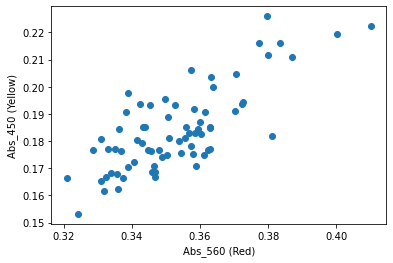

In [3]:
plt.figure()
plt.scatter(df1[df1['Timepoint']==0].Abs_560, df1[df1['Timepoint']==0].Abs_450)
plt.xlabel('Abs_560 (Red)')
plt.ylabel('Abs_450 (Yellow)')
plt.show()


DMSO
CONTROL
HMV
AHC
BYR
TRIG
CBZ
B5
PLGA


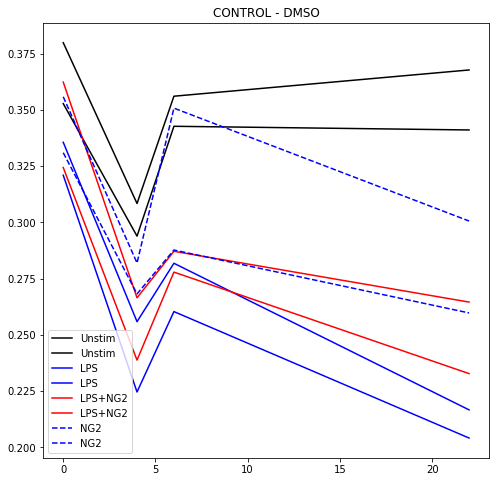

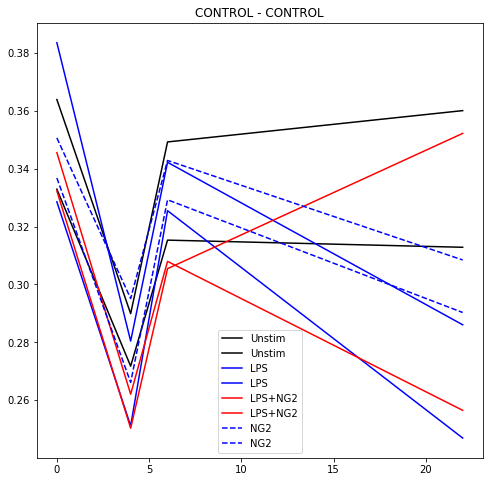

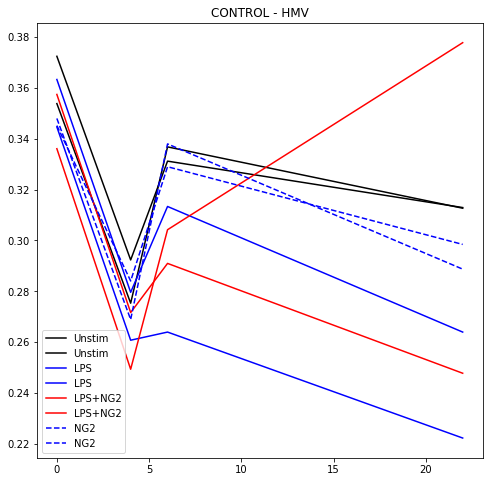

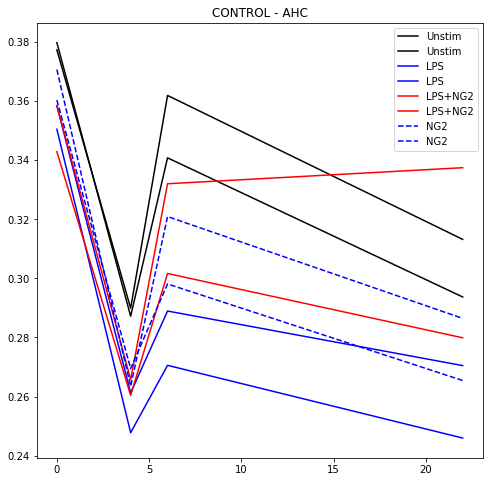

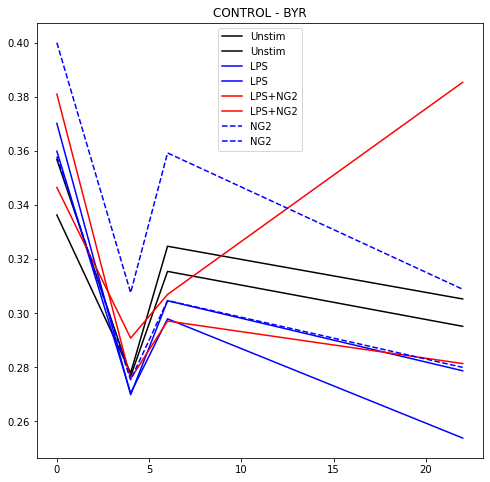

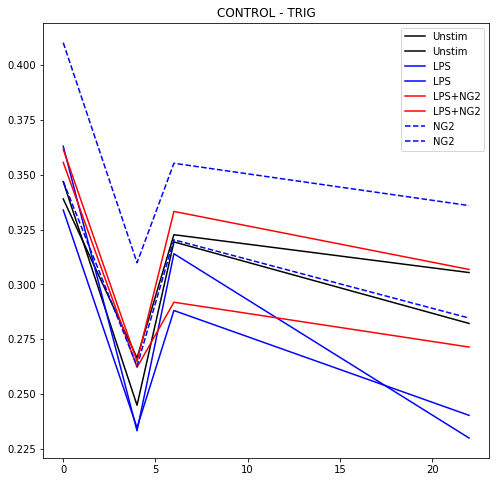

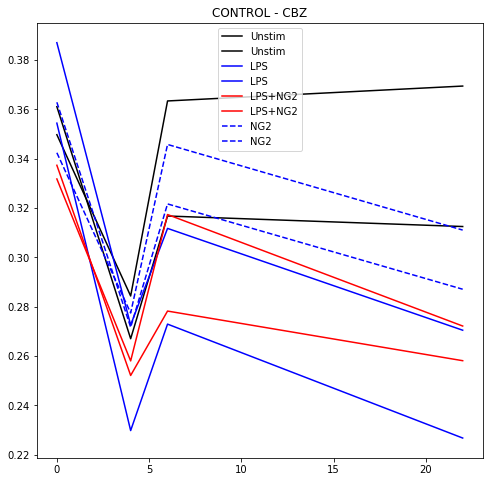

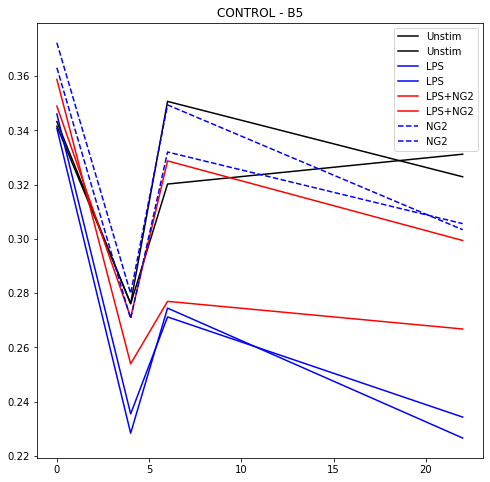

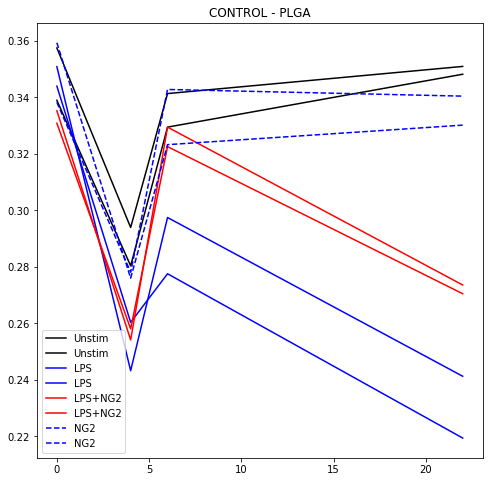

In [4]:
# Iterate through the different metabolites/drugs
for metab in df1.Metabolite.unique():
    print(metab)
    df2 = df1[df1['Metabolite']==metab]
    # For a given metabolite, plot the different treatments 
    # across time on a per-well basis (i.e. trajectory analysis)
    plt.figure(figsize=(8,8))
    plt.title('CONTROL - '+metab)
    # Plot negative control
    for i,g in df2[df2['Pyroptosis condition']=='CONTROL'].groupby('WellPosition'):
        plt.plot(g.Timepoint,g.Abs_560,c='k',label='Unstim')

    # Plot LPS only
    for i,g in df2[df2['Pyroptosis condition']=='LPS'].groupby('WellPosition'):
        plt.plot(g.Timepoint,g.Abs_560,c='b',label='LPS')
    
    # Plot LPS+nigericin
    for i,g in df2[df2['Pyroptosis condition']=='LPS + NG2'].groupby('WellPosition'):
        plt.plot(g.Timepoint,g.Abs_560,c='r',label='LPS+NG2')
    
    # Plot nigericin only
    for i,g in df2[df2['Pyroptosis condition']=='NG2'].groupby('WellPosition'):
        plt.plot(g.Timepoint,g.Abs_560,'b--',label='NG2')
    plt.legend()
# tps = ['Abs_560_0hr', 'Abs_560_4hr','Abs_560_6hr', 'Abs_560_22hr']
# df2 = df1.copy()

# for i in tps:
    #Create Negative controls for 560 at time points
#     negCtrlVal =  df1.loc[(df1['Pyroptosis condition']=='CONTROL') & (df1['Metabolite']=='CONTROL')].i.mean()
    #Create new column that standardizes data 
#     df2['Log2560_posCtrl'+ i] = np.log2(df2[i] / negCtrlVal)
     
    
    
    
# #Negative controls for 560 at all timepoints
# negCtrlValue560tp0 = df1.loc[(df1['Pyroptosis condition']=='CONTROL') & (df1['Metabolite']=='CONTROL')].Abs_560_0hr.mean()
# negCtrlValue560tp4 = df1.loc[(df1['Pyroptosis condition']=='CONTROL') & (df1['Metabolite']=='CONTROL')].Abs_560_4hr.mean()
# negCtrlValue560tp4 = df1.loc[(df1['Pyroptosis condition']=='CONTROL') & (df1['Metabolite']=='CONTROL')].Abs_560_4hr.mean()

# df2 = df1.copy()
# df2['Log2560tp0_posCtrl'] = np.log2(df2['Abs_560_0hr'] / negCtrlValue560tp0)

# #df2['Log2FC560_posCtrl'] = np.log2(df2['Abs_450_0hr'] / negCtrlValue560)
# #print(df_2.shape)
# df2.head()



In [6]:
tp0 = df1[df1['Timepoint']== 0]
tp4 = df1[df1['Timepoint']== 4]
tp22 = df1[df1['Timepoint']== 22]

def plot_negCtrlNorm(df_tp, str_timepoint):
    # Define negative control value
    negCtrlVal = df_tp.loc[(df_tp['Pyroptosis condition']=='CONTROL') &
          (df_tp['Metabolite']=='CONTROL')].Abs_560.mean()
    # perform log2 norm against the neg. ctrl value
    df_tp['Abs_560_norm'] = np.log2(df_tp['Abs_560']/negCtrlVal)
    
    # Begin plotting
    fig,ax = plt.subplots()
    sns.barplot(x='Pyroptosis condition',y='Abs_560_norm',hue='Metabolite',data=df_tp,
               order = ['CONTROL','LPS','NG2','LPS + NG2'],
               saturation=8, ax=ax)
    sns.swarmplot(x='Pyroptosis condition',y='Abs_560_norm',hue='Metabolite',data=df_tp,
               order = ['CONTROL','LPS','NG2','LPS + NG2'], ax=ax,dodge=True, color='black')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.ylabel('Log2 Fold Change normalized with PBS only')
    plt.title('Abs 560 at tp {}'.format(str_timepoint))
    plt.show()


<ipython-input-6-10a1032c3a63>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tp['Abs_560_norm'] = np.log2(df_tp['Abs_560']/negCtrlVal)


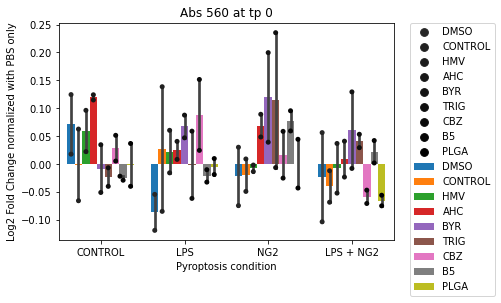

<ipython-input-6-10a1032c3a63>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tp['Abs_560_norm'] = np.log2(df_tp['Abs_560']/negCtrlVal)
/Users/jerenwei/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


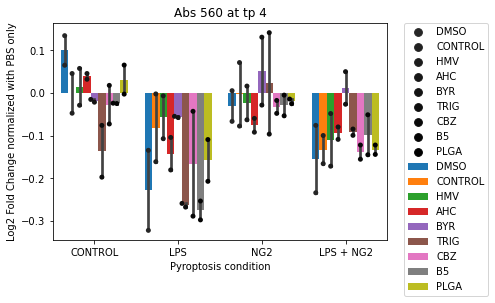

<ipython-input-6-10a1032c3a63>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tp['Abs_560_norm'] = np.log2(df_tp['Abs_560']/negCtrlVal)
/Users/jerenwei/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


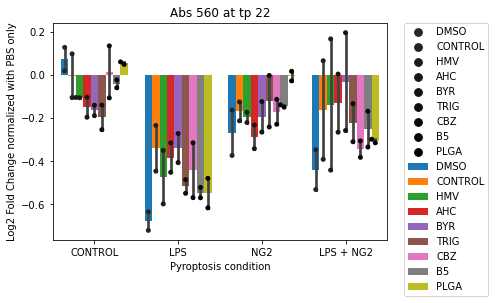

In [7]:
plot_negCtrlNorm(tp0, 0)
plot_negCtrlNorm(tp4, 4)
plot_negCtrlNorm(tp22, 22)